# Loading Libraries
Let us begin our analysis by loading the above mentioned Python Modules/Packages/Libraries.

In [1]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization

To make our plots look nice, let us set a theme for our seaborn (sns) plots and also let us define the size in which we would like to print the plot figures.

In [2]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

# Reading input dataset
In order to read the input data, let us first define the directory/path in which the input file is present. This is to make sure that the path is stored in a string first before using the same (concatenated) with the file name to read the input csv using pd.read_csv() function.

In [3]:
file_path = 'D:\\DATA SCIENCE\\IPL Analysis\\'
matches = pd.read_csv(file_path+'matches.csv')

## Get basic information of Data
To begin humbly, Let us check the basic information of the dataset. The very basic information to know is the dimension of the dataset — rows and columns — that’s what we find out with the method shape.

In [6]:
matches.shape

(636, 18)

And then, It’s important to know the different types of data/variables in the given dataset.

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

Moving one level up, let’s perform a simple summary statistics using the method describe().

In [8]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


And the final level of this basic information retrieval is to see a couple of actual rows of the input dataset.

In [9]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


Now, with the basic understanding of the input dataset. We are promoted to answer our questions with basic data analysis.

## How many matches we’ve got in the dataset?
As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match. So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [10]:
matches['id'].max()

636

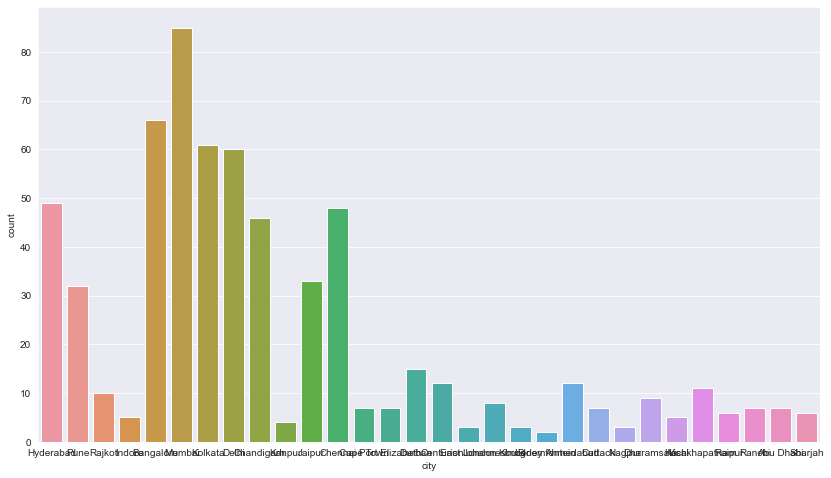

In [11]:
sns.countplot(x='city', data=matches)
plt.show()

## How many matches are really successful with a winning team?

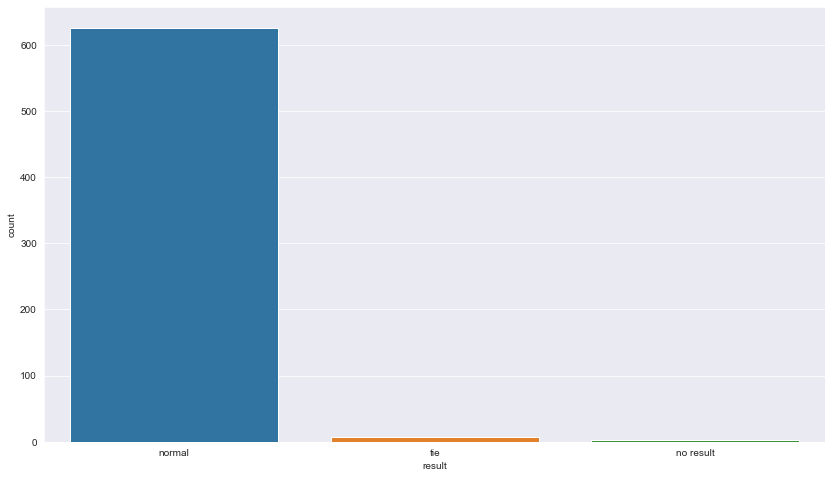

In [12]:
sns.countplot(x='result', data=matches)
plt.show()

## How many seasons we’ve got in the dataset?
IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [13]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [14]:
len(matches['season'].unique())

10

## Which season had most number of matches?
We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.

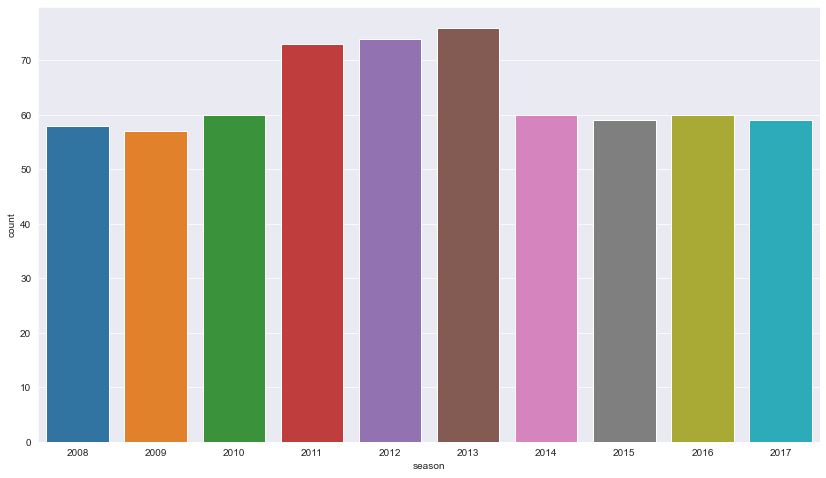

In [18]:
sns.countplot(x='season', data=matches)
plt.show()
## countplot() function in seaborn does the job right away (without the need of an explicit group_by and count)

## The most successful IPL Team
The most successful IPL team is the team that has won most number of times. Which also means, answer it to this is as same as the above exercise except counting the number of instances in each season, here we’ve to count the number of instances in each winning team.

<function matplotlib.pyplot.show(*args, **kw)>

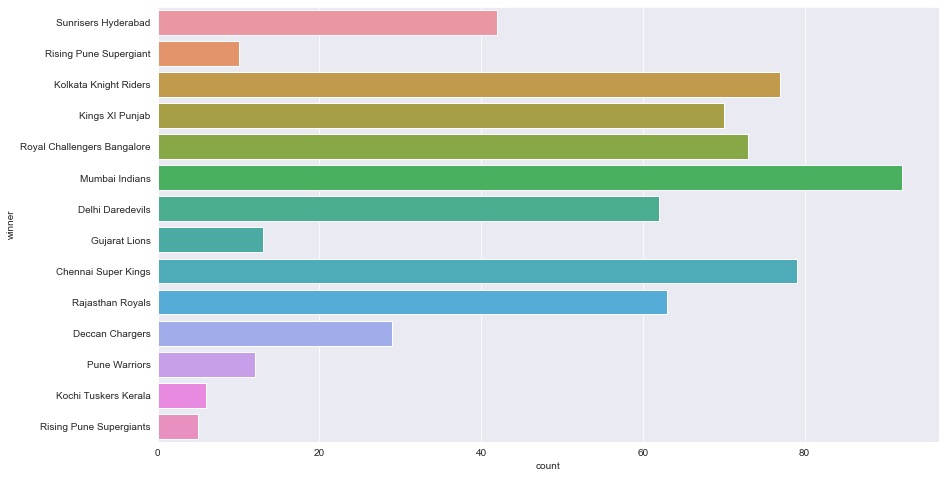

In [16]:
sns.countplot(y='winner', data = matches)
plt.show

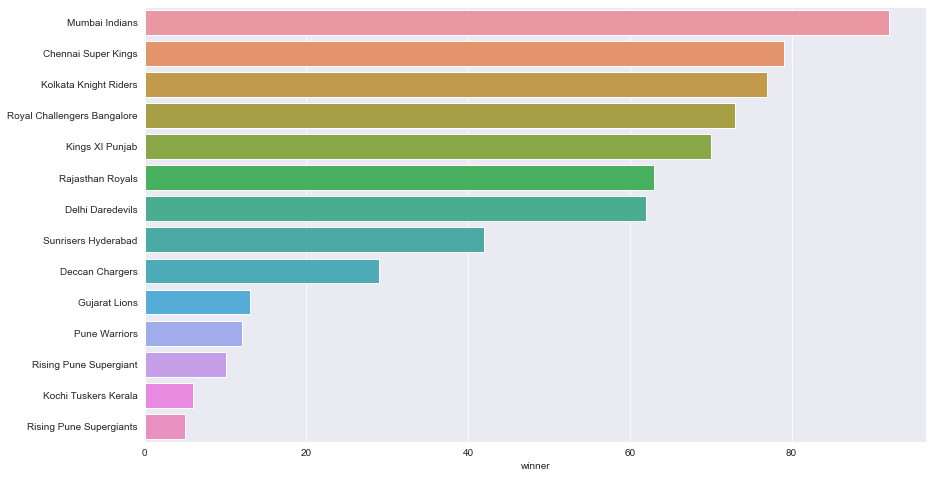

In [29]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

## Which Team had won by maximum runs?
To answer this question, we can divide the question logically — first we need to find maximum runs, then we can find the row (winning team) with this maximum runs — which would indeed be the team won by maximum runs. I’d like to emphasis here that it’s always important to divide your problem into logical sub-problems or modules and then build Python expressions/codes for those sub-modules finally adding them up to required code that will result in the solution.

In [21]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

idxmax will return the id of the maximumth value which in turn is fed into iloc that takes an index value and returns the row.
If we’re interested only in the winning team in that row, then that could be retrieved as below.

In [22]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

## Which Team had won by maximum wickets?
Similar to the above one, this question should be straightforward to answer.

In [23]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## Which Team had won by (closest margin) minimum runs?
To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.

In [24]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

## Which Team had won by minimum wickets?
Going by the same logic as above:

In [25]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

## Top player of the match Winners

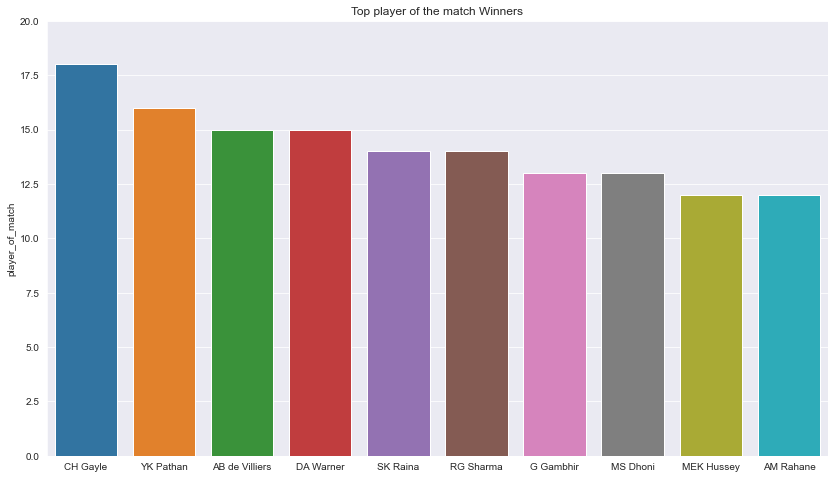

In [31]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

## Has Toss-winning helped in Match-winning?
Having solved those not-so-tough questions above, we are nowhere to extract a critical insight — which is — Has winning toss actually helped in winning the match?
Using our same approach of dividing our problem into chunks — we can separate this question into two — match winner and toss winner if both of them are same — then it’s a success and if not it’s a failure. Before visualizing the outcome, let us first see how the numbers look.

In [32]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

Looks like, Toss winning actually helps in Match winning — or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.

## To visualize the result:

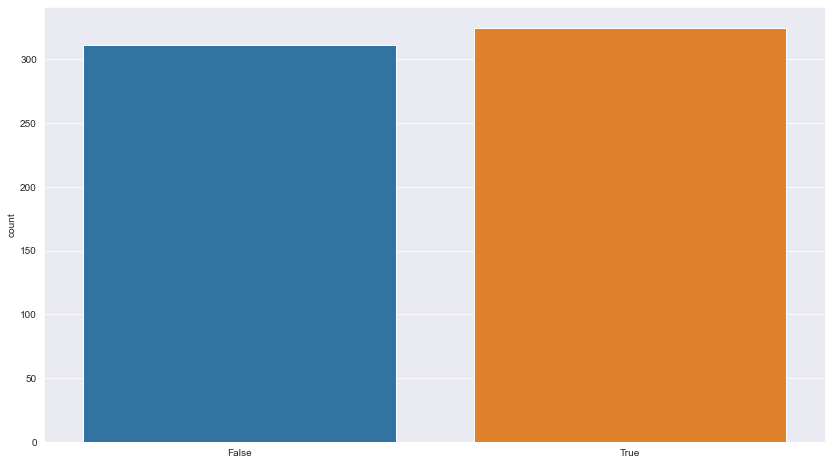

In [33]:
sns.countplot(matches['toss_winner'] == matches['winner'])
sns.countplot(ss);